# Analysis of Nykaa's Best Skin Care Products Online

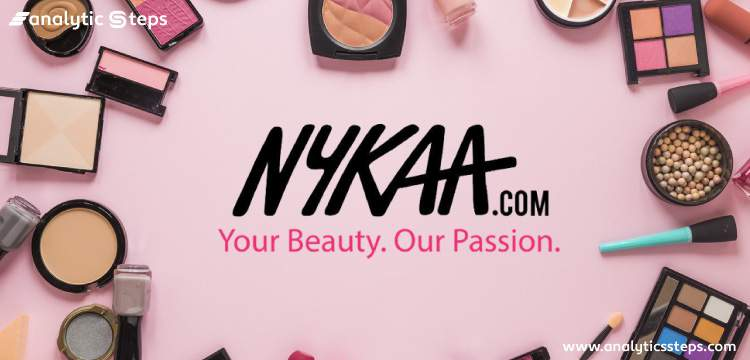

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data=pd.read_csv("Nykaa_BestSkinProducts.csv")

### BASIC CHECKS

In [3]:
# First five rows
data.head()

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,0,Olay Night Cream: Regenerist Retinol 24 Moistu...,( 5891 ),MRP:₹1999,₹1299,35% Off,NaN
1,1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,( 19756 ),MRP:₹699,₹629,10% Off,Enjoy Free Gift
2,2,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5023 ),MRP:₹749,₹614,18% Off,NaN
3,3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1405 ),MRP:₹699,₹559,20% Off,NaN
4,4,Kapiva Ayurveda Kumkumadi Glow Face Oil,( 64 ),MRP:₹699,₹499,29% Off,NaN


In [4]:
# Last five rows
data.tail()

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
11995,11995,WOW Skin Science Retinol Foaming Face Wash,( 3 ),MRP:₹349,₹332,5% Off,NaN
11996,11996,WOW Skin Science Retinol Foaming Face Wash,( 3 ),MRP:₹349,₹332,5% Off,NaN
11997,11997,Organic Harvest Rose Bathing Bar - Pack of 2,( 222 ),MRP:,₹198,NaN,NaN
11998,11998,Fabessentials Rose Tulsi Hand & Body Lotion,( 2 ),MRP:₹350,₹315,10% Off,NaN
11999,11999,Riyo Herbs Face Sheet Mask Combo - Pack of 4,( 141 ),MRP:₹650,₹520,20% Off,NaN


In [5]:
# Shape of data
data.shape

(12000, 7)

* Dataset contains 7 columns with 12000 rows.

In [6]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Product Name    12000 non-null  object
 2   Reviews         11074 non-null  object
 3   Original Price  12000 non-null  object
 4   Offer Price     12000 non-null  object
 5   Discount        9165 non-null   object
 6   Free Gifts      3537 non-null   object
dtypes: int64(1), object(6)
memory usage: 656.4+ KB


### DATA CLEANING

In [7]:
data.columns

Index(['Unnamed: 0', 'Product Name', 'Reviews', 'Original Price',
       'Offer Price', 'Discount', 'Free Gifts'],
      dtype='object')

In [8]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,Olay Night Cream: Regenerist Retinol 24 Moistu...,( 5891 ),MRP:₹1999,₹1299,35% Off,NaN
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,( 19756 ),MRP:₹699,₹629,10% Off,Enjoy Free Gift
2,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5023 ),MRP:₹749,₹614,18% Off,NaN
3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1405 ),MRP:₹699,₹559,20% Off,NaN
4,Kapiva Ayurveda Kumkumadi Glow Face Oil,( 64 ),MRP:₹699,₹499,29% Off,NaN


In [9]:
# Cleaning Columns
data['Reviews']=data.Reviews.str.replace('\(|\)','',regex=True)
data['Original Price']=data['Original Price'].str.replace('MRP:₹','',regex=True)
data['Original Price']=data['Original Price'].str.replace('MRP:','',regex=True)
data['Offer Price']=data['Offer Price'].str.replace('₹','',regex=True)

In [10]:
data.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,Olay Night Cream: Regenerist Retinol 24 Moistu...,5891,1999,1299,35% Off,NaN
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,19756,699,629,10% Off,Enjoy Free Gift
2,L'Oreal Paris Glycolic Bright Serum With Glyco...,5023,749,614,18% Off,NaN
3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1405,699,559,20% Off,NaN
4,Kapiva Ayurveda Kumkumadi Glow Face Oil,64,699,499,29% Off,NaN


In [11]:
# Checking missing values
data.isnull().sum()

Product Name         0
Reviews            926
Original Price       0
Offer Price          0
Discount          2835
Free Gifts        8463
dtype: int64

* Reviews,Discount,Free Gifts present missing values in data.

In [12]:
# Missing value of Discount
data.Discount = data.Discount.fillna('0% Off')

In [13]:
# Missing values of free gifts
data['Free Gifts']=data['Free Gifts'].fillna('No Gift')

In [14]:
data.isnull().sum()

Product Name        0
Reviews           926
Original Price      0
Offer Price         0
Discount            0
Free Gifts          0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Name    12000 non-null  object
 1   Reviews         11074 non-null  object
 2   Original Price  12000 non-null  object
 3   Offer Price     12000 non-null  object
 4   Discount        12000 non-null  object
 5   Free Gifts      12000 non-null  object
dtypes: object(6)
memory usage: 562.6+ KB


In [16]:
# Changing data types to numeric type
data['Reviews']=pd.to_numeric(data['Reviews'])
data['Original Price']=pd.to_numeric(data['Original Price'])
data['Offer Price']=pd.to_numeric(data['Offer Price'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    12000 non-null  object 
 1   Reviews         11074 non-null  float64
 2   Original Price  9187 non-null   float64
 3   Offer Price     12000 non-null  int64  
 4   Discount        12000 non-null  object 
 5   Free Gifts      12000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 562.6+ KB


In [18]:
#Now we can fill the missing values in Original Price with Offer Price
data['Original Price']=data['Original Price'].fillna(data['Offer Price'])

In [19]:
#Filling missing values in Reviews column with 0
data['Reviews']=data['Reviews'].fillna(0)

In [20]:
#Checking null values after filling the data
data.isnull().sum()

Product Name      0
Reviews           0
Original Price    0
Offer Price       0
Discount          0
Free Gifts        0
dtype: int64

In [21]:
# Checking duplicate values
data.duplicated().sum()

2662

In [22]:
#Checking duplicates in a tabular format for a better understanding
duplicate_rows = data.duplicated()
duplicate_data = data[duplicate_rows]
duplicate_data.sample(10)

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
9997,Organic Harvest Rose Bathing Bar - Pack of 2,222.0,198.0,198,0% Off,No Gift
4582,BoroPlus Antiseptic + Moisturising Soap Neem T...,231.0,378.0,284,25% Off,No Gift
6180,Soulflower Olive Carrier Oil Castor Oil & Rose...,1623.0,1150.0,978,15% Off,No Gift
10057,Organic Harvest Rose Bathing Bar - Pack of 2,222.0,198.0,198,0% Off,No Gift
8285,AyouthVeda Moringa & Sea Buckthorn Hand Cream ...,0.0,249.0,187,25% Off,No Gift
10315,WOW Skin Science Retinol Foaming Face Wash,3.0,349.0,332,5% Off,No Gift
1361,Nivea Soft Light Moisturizer Cream Playful Pea...,1872.0,325.0,244,25% Off,Extra 10% Off
6440,L'Occitane Immortelle Precious Cream with Dyna...,40.0,1150.0,1150,0% Off,Enjoy Free Gift
10758,Fabessentials Rose Tulsi Hand & Body Lotion,2.0,350.0,315,10% Off,No Gift
10938,Arata Vitamin C Luminous Day Cream & Face Seru...,4.0,1099.0,550,50% Off,No Gift


* There is similar data, so we should remove duplicate rows.

In [23]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [24]:
# Now check shape of data
data.shape

(9338, 6)

In [25]:
#Let's extract the Brand name from the Product name column
data['Product Name'].sample(10)

8632    Wishcare Premium Cold Pressed Castor Oil & Col...
2385    L'Occitane Immortelle Divine Youth Oil - New F...
1097    inde wild 1% Bakuchiol + 0.5% Tripeptide Resto...
8578     Keya Seth Aromatherapy Skin Defence Orange Cream
4444          St.Botanica Vitamin C Brightening Face Wash
2283    Bath & Body Works Teakwood 3-In-1 Hair + Face ...
2427    Plum Charcoal Do-The-Detox Face Wash For Purif...
8658             Kama Ayurveda Lavanya Natural Plant Mask
1271                      Bare Essentials Oval Loofah Pad
6891    Oziva Plant Based Collagen Builder + Plant Bas...
Name: Product Name, dtype: object

#### Extracting Brand Name from Product Name column

In [26]:
column_split = data['Product Name'].str.split('/',n=0,expand=True)
column_split

#Importing regular expression library
import re

data['Brand'] = data['Product Name'].apply(lambda x:' '.join(re.findall(r'\b\w+\b',x)[:3]) if re.findall(r'\b\w+\b', x) else None)

# Print the extracted brand names
print(data['Brand'])

0                 Olay Night Cream
1              Nykaa Naturals Skin
2                    L Oreal Paris
3                  Nykaa SKINRX 10
4        Kapiva Ayurveda Kumkumadi
                   ...            
10001       Kimirica Five Elements
10002          Superdrug Vitamin E
10003           Jovees Apple Grape
10118             Dr Barbara Sturm
10119       Spawake White Solution
Name: Brand, Length: 9338, dtype: object


In [27]:
data['Discount (% OFF)'] = data['Discount'].str.replace('% Off', '', regex=True)
data['Discount (% OFF)'] = pd.to_numeric(data['Discount (% OFF)'])
data.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts,Brand,Discount (% OFF)
0,Olay Night Cream: Regenerist Retinol 24 Moistu...,5891.0,1999.0,1299,35% Off,No Gift,Olay Night Cream,35
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,19756.0,699.0,629,10% Off,Enjoy Free Gift,Nykaa Naturals Skin,10
2,L'Oreal Paris Glycolic Bright Serum With Glyco...,5023.0,749.0,614,18% Off,No Gift,L Oreal Paris,18
3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1405.0,699.0,559,20% Off,No Gift,Nykaa SKINRX 10,20
4,Kapiva Ayurveda Kumkumadi Glow Face Oil,64.0,699.0,499,29% Off,No Gift,Kapiva Ayurveda Kumkumadi,29


### DATA VISUALIZATION

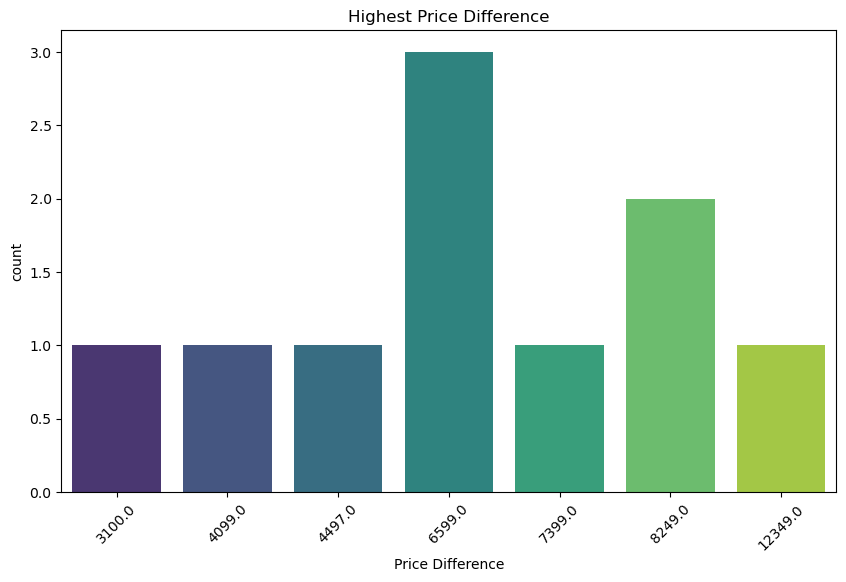

In [28]:
# Calculate the price difference
data['Price Difference']=data['Original Price'] - data['Offer Price']

# Sort the DataFrame by Price Difference column
sorted_data = data.sort_values('Price Difference',ascending=False)

# Plot the price difference analysis
plt.figure(figsize=(10,6))
sns.countplot(x='Price Difference',data=sorted_data.head(10), palette='viridis')
plt.title('Highest Price Difference')
plt.xlabel('Price Difference')
plt.xticks(rotation=45)
plt.show()

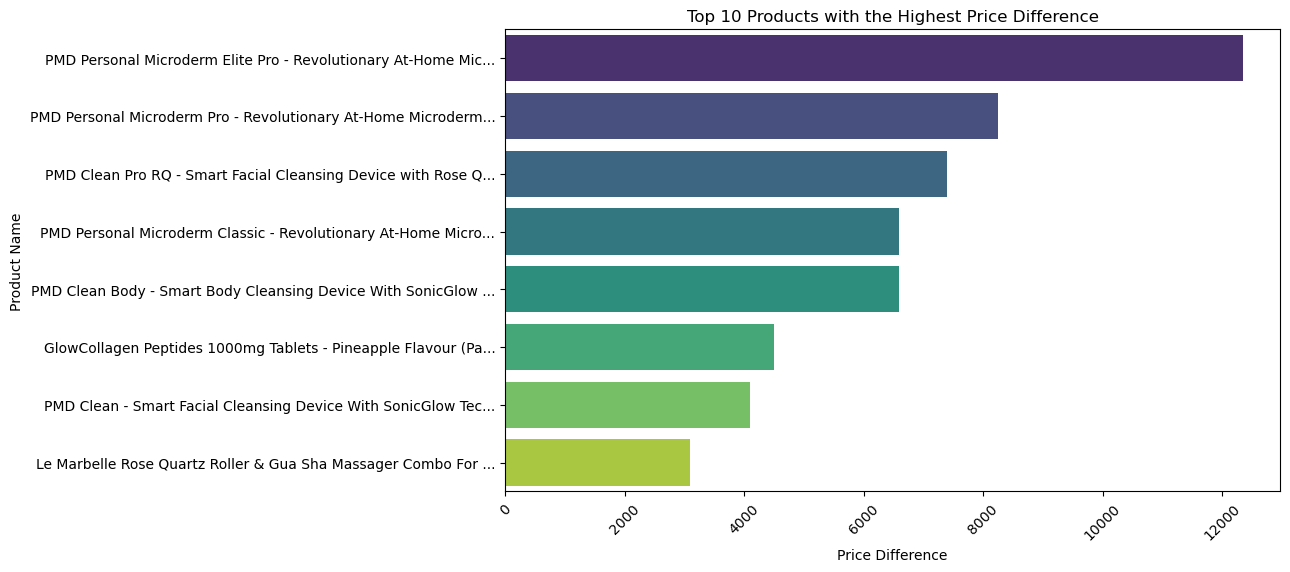

In [29]:
# Plot the price difference analysis
plt.figure(figsize=(10,6))
sns.barplot(x='Price Difference', y='Product Name', data=sorted_data.head(10), palette='viridis')
plt.title('Top 10 Products with the Highest Price Difference')
plt.ylabel('Product Name')
plt.xlabel('Price Difference')
plt.xticks(rotation=45)
plt.show()

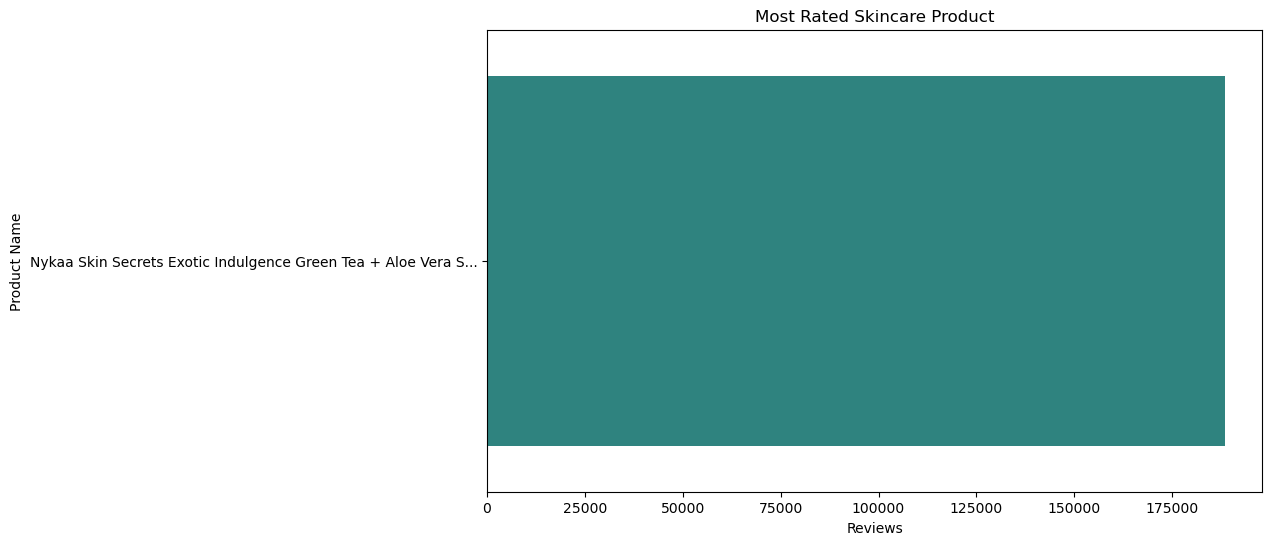

In [30]:
# Sort the DataFrame by Reviews column to get the most rated product
most_rated_product = data.sort_values('Reviews', ascending=False).iloc[0]

# Create a bar plot to visualize the most rated product
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Product Name', data=pd.DataFrame([most_rated_product]), palette='viridis')
plt.title('Most Rated Skincare Product')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()

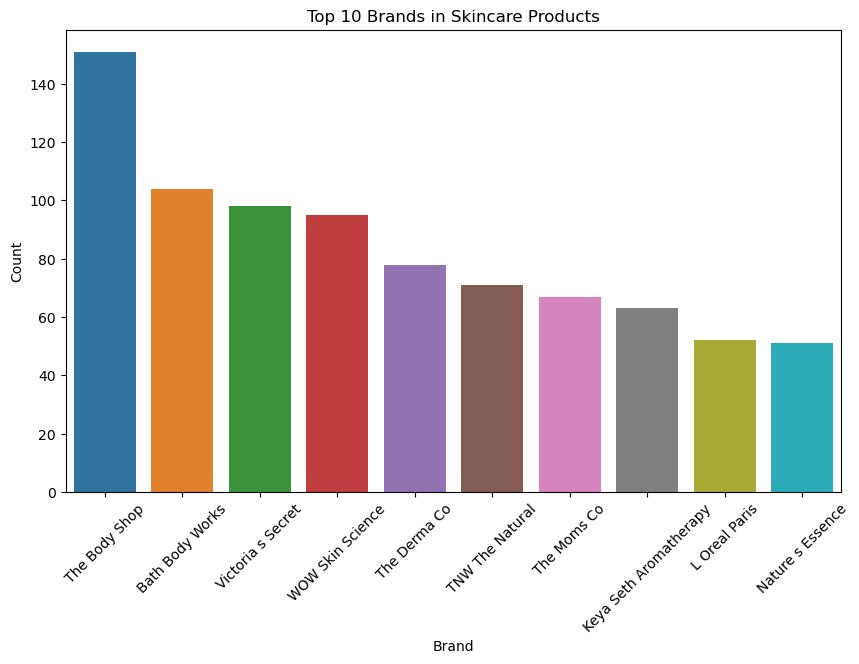

In [31]:
# Perform brand analysis
brand_counts = data['Brand'].value_counts()
top_brands = brand_counts.head(10)  # Select the top 10 brands for visualization

# Plot the brand analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands in Skincare Products')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

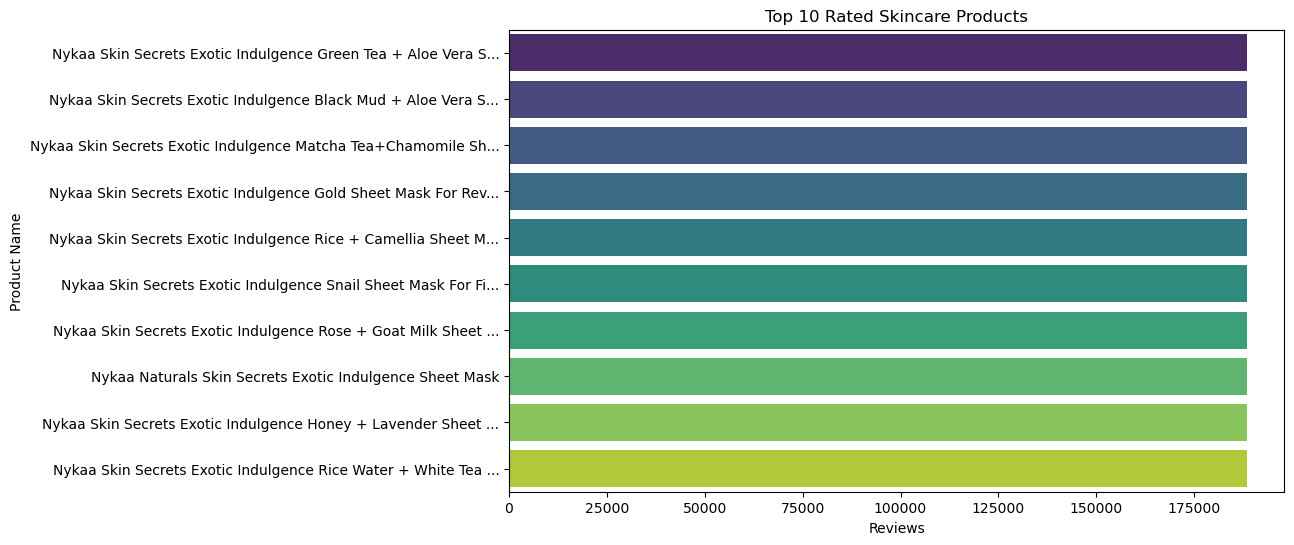

In [32]:
# Sort the DataFrame by Reviews column to get top-rated products
top_rated_products = data.sort_values('Reviews', ascending=False).head(10)

# Plot the top-rated products using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Product Name', data=top_rated_products, palette='viridis')
plt.title('Top 10 Rated Skincare Products')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()

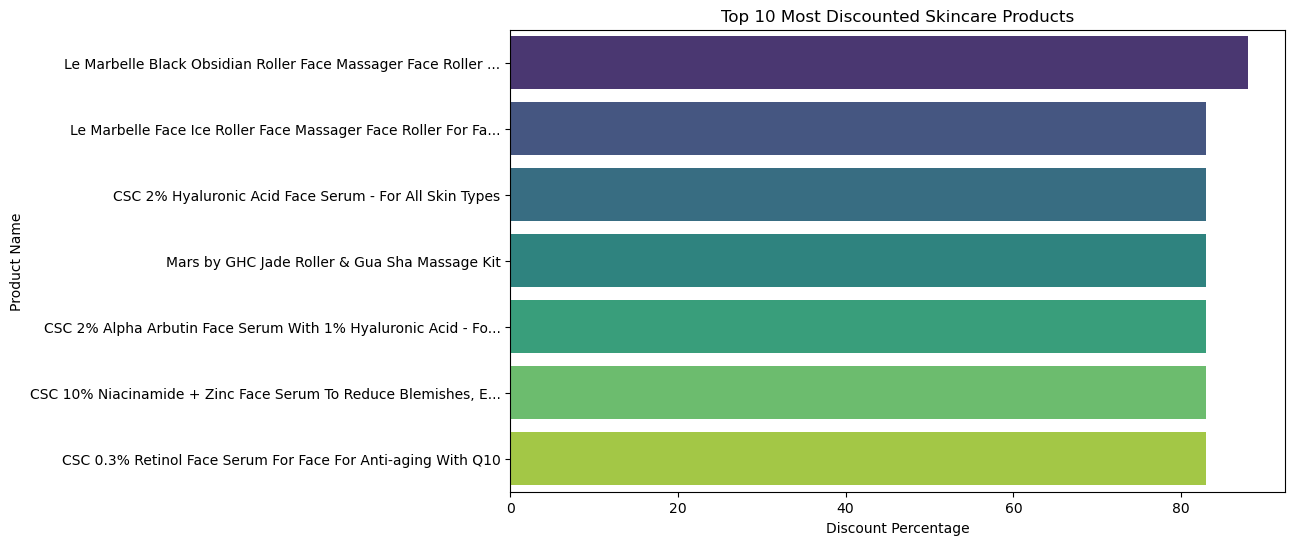

In [33]:
# Sort the DataFrame by Discount Percentage to get the most discounted products
most_discounted_products = data.sort_values('Discount (% OFF)', ascending=False).head(10)

# Plot the most discounted products using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount (% OFF)', y='Product Name', data=most_discounted_products, palette='viridis')
plt.title('Top 10 Most Discounted Skincare Products')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.show()

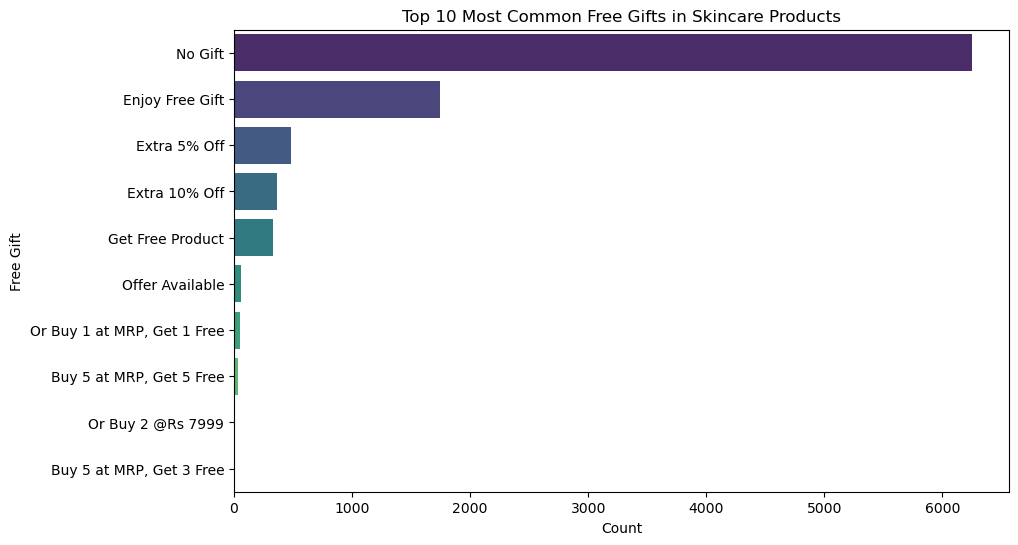

In [34]:
# Extract the unique free gifts and their frequencies
free_gift_counts = data['Free Gifts'].value_counts().reset_index()
free_gift_counts.columns = ['Free Gift', 'Count']

# Sort the free gifts by count in descending order
free_gift_counts.sort_values('Count', ascending=False, inplace=True)

# Plot the free gifts analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Free Gift', data=free_gift_counts.head(10), palette='viridis')
plt.title('Top 10 Most Common Free Gifts in Skincare Products')
plt.xlabel('Count')
plt.ylabel('Free Gift')
plt.show()

### CORRELATION ANALYSIS

<AxesSubplot:>

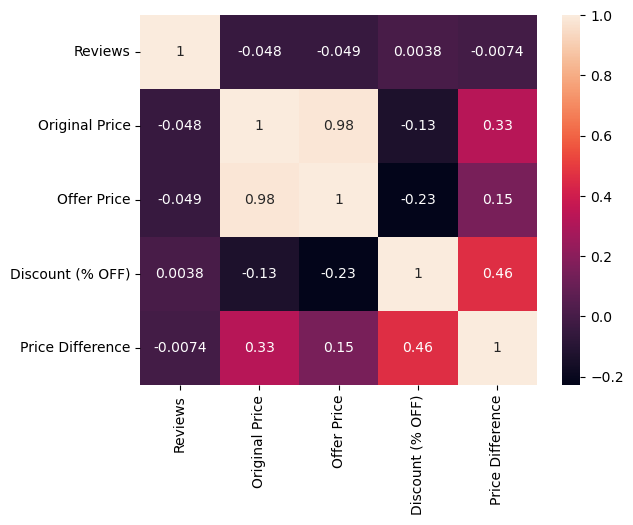

In [35]:
sns.heatmap(data.corr(),annot=True)